## Mini Python Data Analysis Projects
#### 1. Mean Variance Standard Deviation Calculator Project

In [5]:
import numpy as np 

def calculate(list):
    if (len(list) != 9):
        raise ValueError("List must contain nine numbers")
    calc = np.array(list).reshape(3,3)
    calculations = {
        'mean': [np.mean(calc,axis=0).tolist(),
                np.mean(calc,axis=1).tolist(),
                np.mean(calc).tolist()],
        'variance': [np.var(calc,axis=0).tolist(),
                    np.var(calc,axis=1).tolist(),
                    np.var(calc).tolist()],
        'standard deviation': [np.std(calc,axis=0).tolist(),
                              np.std(calc,axis=1).tolist(),
                              np.std(calc).tolist()],
        'max': [np.max(calc,axis=0).tolist(),
               np.max(calc,axis=1).tolist(),
               np.max(calc).tolist()],

        'min': [np.min(calc,axis=0).tolist(),
               np.min(calc,axis=1).tolist(),
               np.min(calc).tolist()],
        'sum': [np.sum(calc,axis=0).tolist(),
               np.sum(calc,axis=1).tolist(),
               np.sum(calc).tolist()]
    }
    return calculations

n = [0,1,2,3,4,5,6,7,8]
print("Here's the result:","\n",calculate(n))

Here's the result: 
 {'mean': [[3.0, 4.0, 5.0], [1.0, 4.0, 7.0], 4.0], 'variance': [[6.0, 6.0, 6.0], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666], 6.666666666666667], 'standard deviation': [[2.449489742783178, 2.449489742783178, 2.449489742783178], [0.816496580927726, 0.816496580927726, 0.816496580927726], 2.581988897471611], 'max': [[6, 7, 8], [2, 5, 8], 8], 'min': [[0, 1, 2], [0, 3, 6], 0], 'sum': [[9, 12, 15], [3, 12, 21], 36]}


## 2. Demographic  Data Analyzer 

In [1]:
import pandas as pd


def calculate_demographic_data(print_data=True):
    # Read data from file
    df = pd.read_csv('adult.data.csv')
    # How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
    race_count = df["race"].value_counts()

    # What is the average age of men?
    average_age_men = round(df[df['sex'] == 'Male']['age'].mean(),1)

    # What is the percentage of people who have a Bachelor's degree?
    percentage_bachelors = round((df['education']=='Bachelors').mean() * 100, 1)

    # What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
    higher_education = df['education'].isin(['Bachelors','Masters','Doctorate'])
    lower_education = ~df['education'].isin(['Bachelors','Masters','Doctorate'])

    # percentage with salary >50K
    higher_education_rich = round((df[higher_education]['salary'] == '>50K').mean()*100, 1)
    lower_education_rich = round((df[lower_education]['salary']=='>50K').mean()*100,1)

    # What is the minimum number of hours a person works per week (hours-per-week feature)?
    min_work_hours = df['hours-per-week'].min()

    # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
    num_min_workers = df[df['hours-per-week']==min_work_hours]

    rich_percentage = round((num_min_workers['salary'] == '>50K').mean()*100,1)

    # What country has the highest percentage of people that earn >50K?
    country_stats = (df[df['salary']=='>50K']['native-country'].value_counts() / df['native-country'].value_counts()) * 100
    highest_earning_country = country_stats.idxmax()
    highest_earning_country_percentage = round(country_stats.max(),1)

    # Identify the most popular occupation for those who earn >50K in India.
    top_IN_occupation = df[(df['native-country']=='India') & (df['salary']=='>50K')]['occupation'].value_counts().idxmax()

    # DO NOT MODIFY BELOW THIS LINE

    if print_data:
        print("Number of each race:\n", race_count) 
        print("Average age of men:", average_age_men)
        print(f"Percentage with Bachelors degrees: {percentage_bachelors}%")
        print(f"Percentage with higher education that earn >50K: {higher_education_rich}%")
        print(f"Percentage without higher education that earn >50K: {lower_education_rich}%")
        print(f"Min work time: {min_work_hours} hours/week")
        print(f"Percentage of rich among those who work fewest hours: {rich_percentage}%")
        print("Country with highest percentage of rich:", highest_earning_country)
        print(f"Highest percentage of rich people in country: {highest_earning_country_percentage}%")
        print("Top occupations in India:", top_IN_occupation)

    return {
        'race_count': race_count,
        'average_age_men': average_age_men,
        'percentage_bachelors': percentage_bachelors,
        'higher_education_rich': higher_education_rich,
        'lower_education_rich': lower_education_rich,
        'min_work_hours': min_work_hours,
        'rich_percentage': rich_percentage,
        'highest_earning_country': highest_earning_country,
        'highest_earning_country_percentage':
        highest_earning_country_percentage,
        'top_IN_occupation': top_IN_occupation
    }


## 3. Medical Data Visualizer 

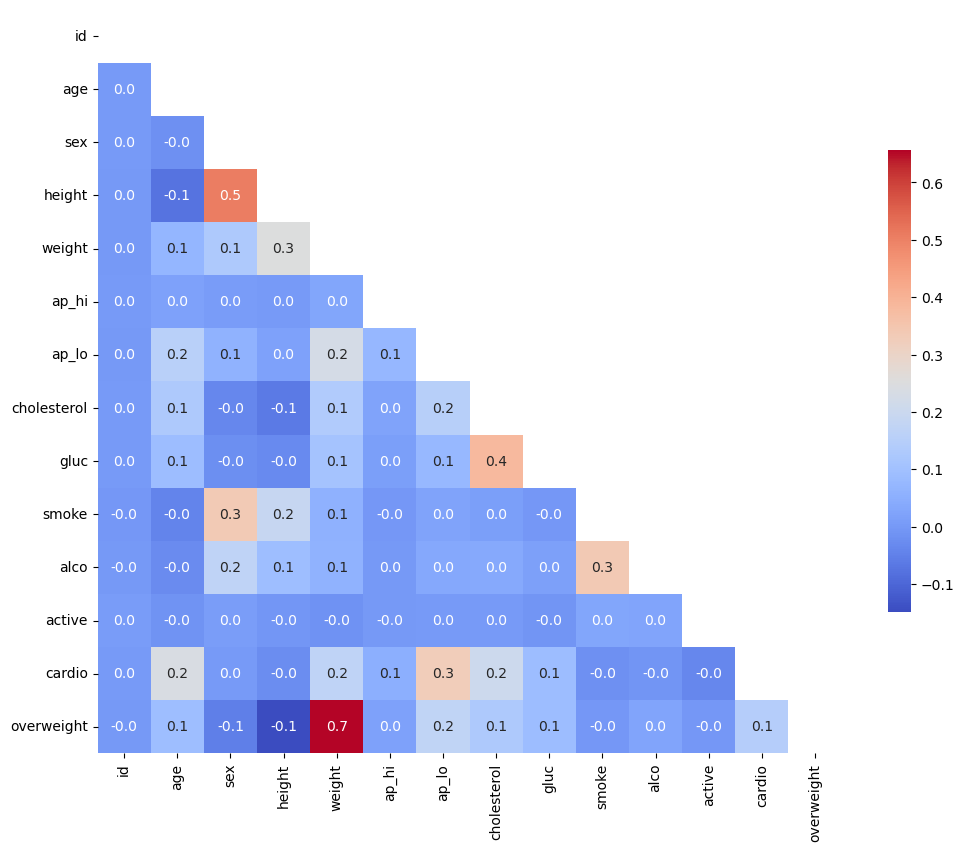

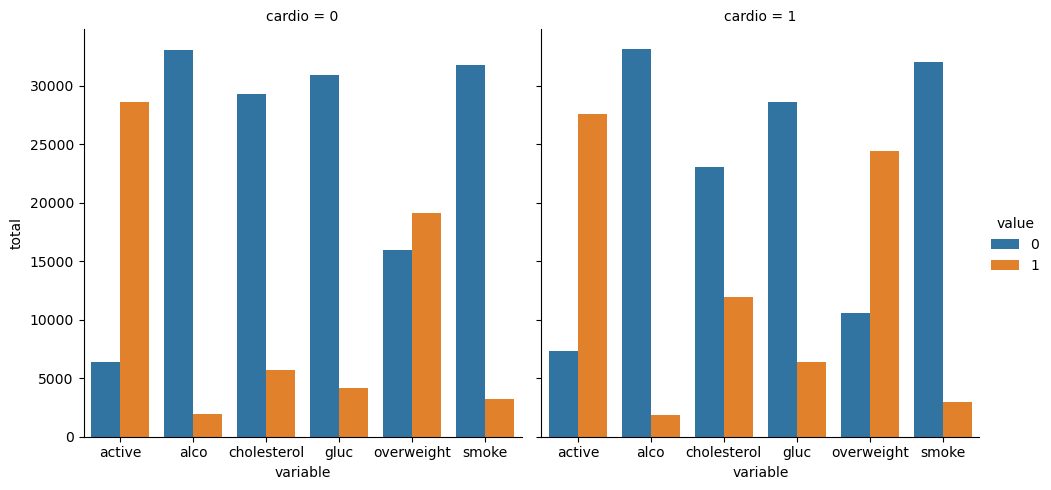

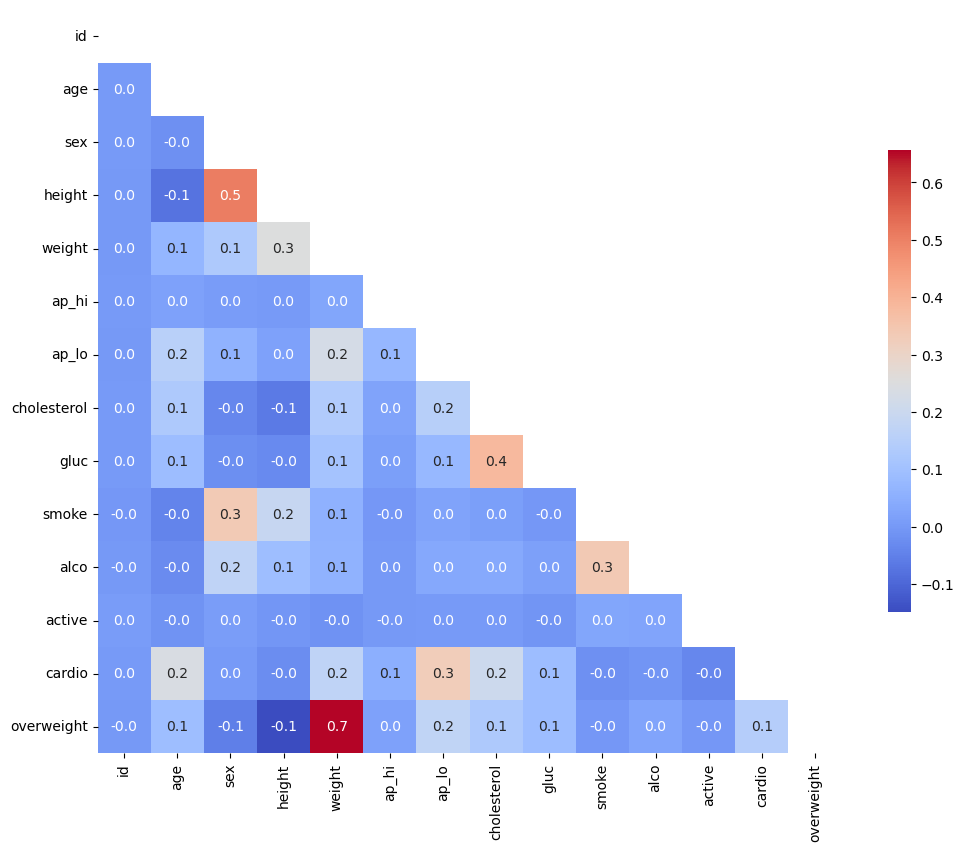

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('medical_examination.csv')
# df.head()
df["overweight"] = (df["weight"]/((df["height"]/100)**2) >25).astype(int) # Create a overweight column 

df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1) #Normalize the cholesterol column
df['gluc'] = df['gluc'].apply(lambda x: 0 if x==1 else 1) #Normalize the gluc column 

def draw_cat_plot():
    # creating a dataframe for the cat plot using pd.melt
    df_cat = pd.melt(df,id_vars = ['cardio'], #columns to keep 
                    value_vars = ['cholesterol','gluc','smoke','alco','active','overweight']) #columns to melt 
    # Group and reformat the data for sns.catplot 
    fig = sns.catplot(
        x = 'variable',
        hue = 'value',
        col = 'cardio',
        data = df_cat,
        kind = 'count',
        height=5,
        aspect=1,
        order=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'] 
    )

    fig.set_ylabels('total')
    
    # get the figure for output
    fig = fig.fig
    # save the figure 
    fig.savefig('catplot.png')
    return fig

def draw_heat_map():
    # Clean the data 
    df_heat = df[
    (df['ap_lo']<=df['ap_hi']) & #Diastolic <= Systolic 
    (df['height']>=df['height'].quantile(0.025)) & # Height >= 2.5th percentile 
    (df['height']<=df['height'].quantile(0.975)) & # Height <= 97.5th percentile 
    (df['weight']>=df['weight'].quantile(0.025)) & # Weight >= 2.5th percentile
    (df['weight']<=df['weight'].quantile(0.975)) # Weight <= 97.5th percentile
    ]
    #calculate the correlation matrix 
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr,dtype=bool))

    #Set up the matplotlib figure 
    fig, ax = plt.subplots(figsize=(12,12))

    #Draw the heatmap 
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt='.1f',
        square=True,
        cmap="coolwarm",
        cbar_kws={"shrink":0.5},
        ax=ax
    )

    #Save the figure
    fig.savefig('heatmap.png')
    return fig
                     
draw_cat_plot()
draw_heat_map()

## 4. Time Series Visualizer

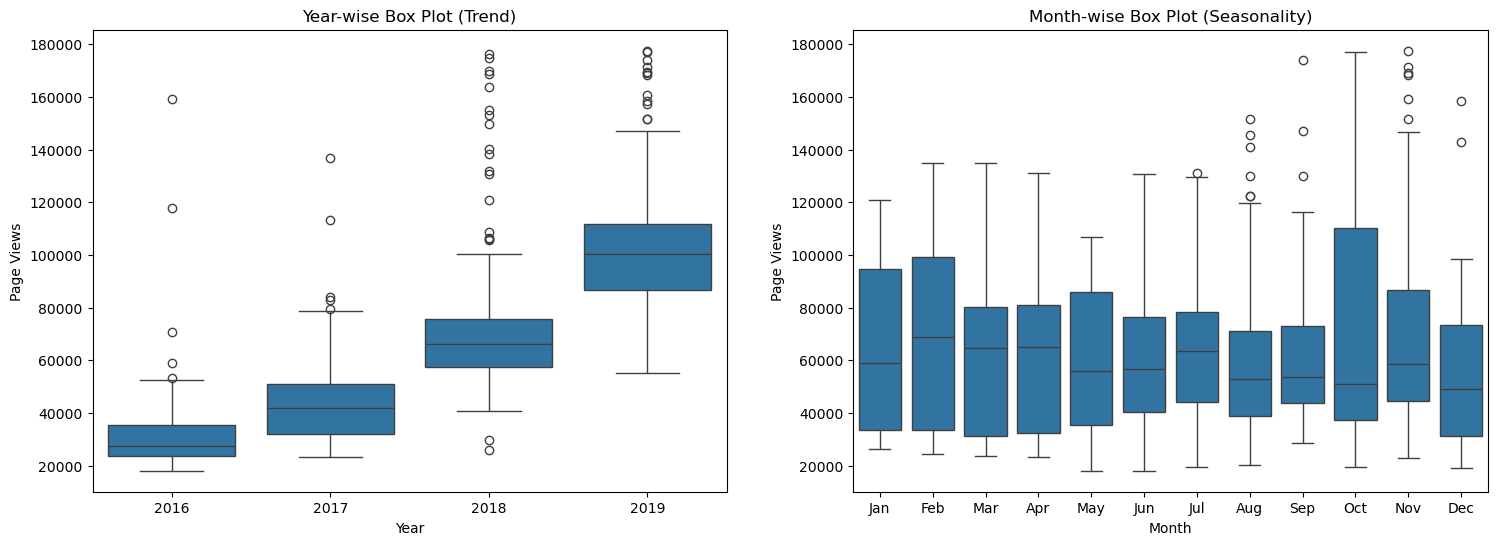

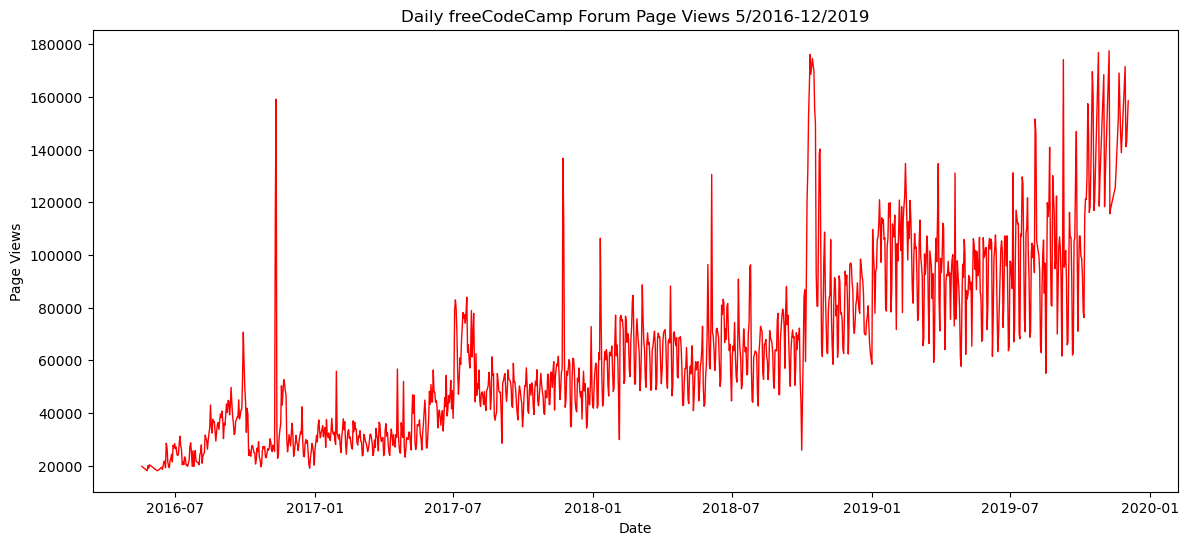

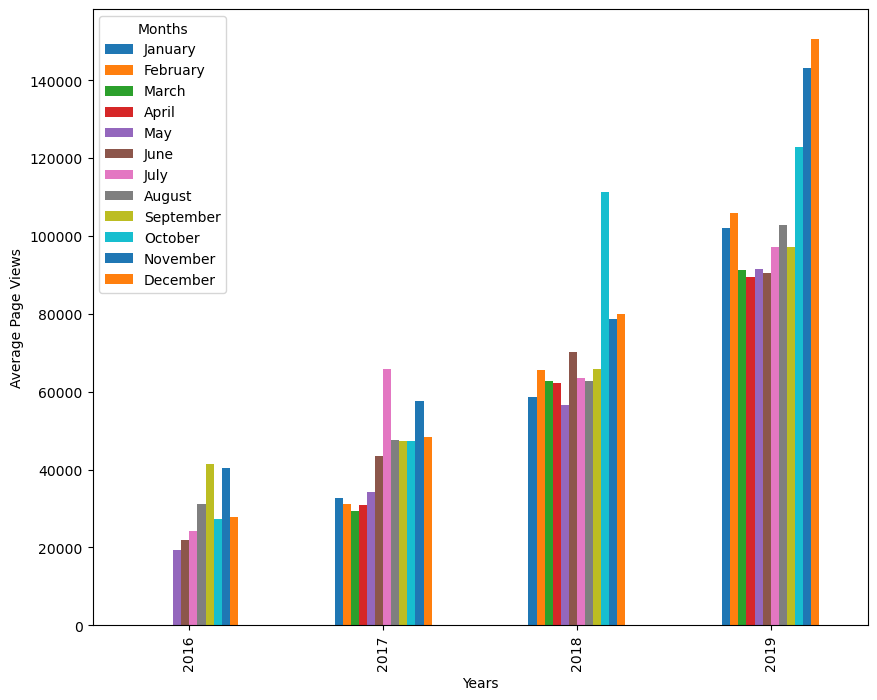

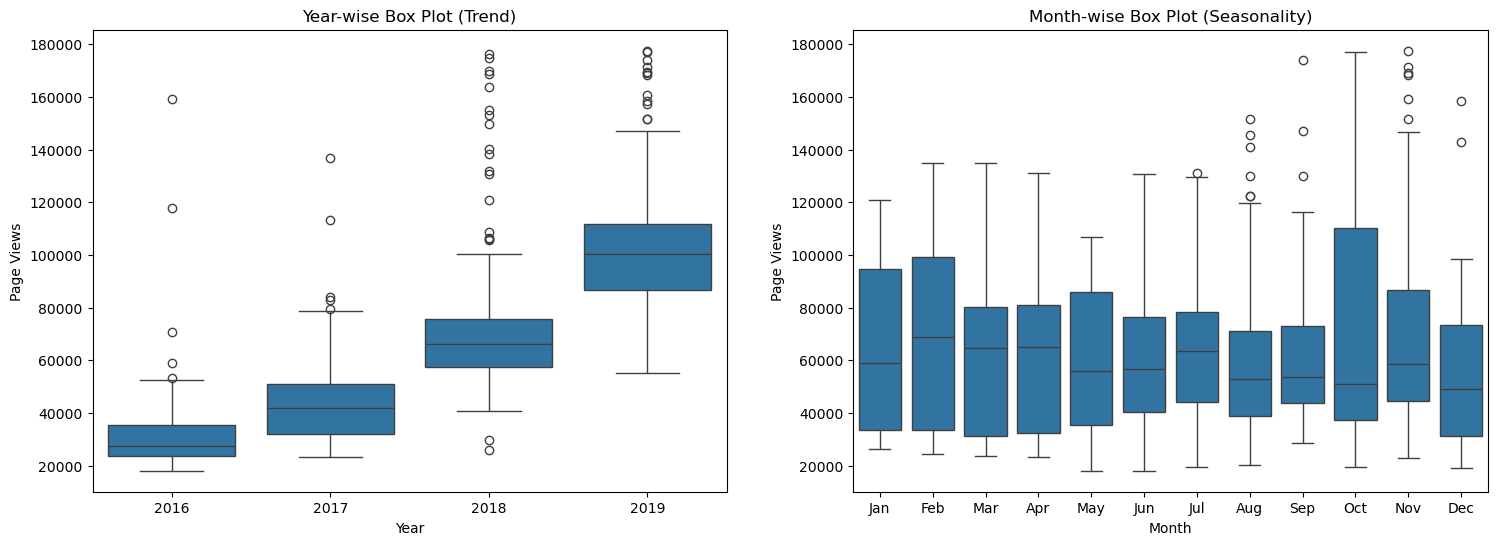

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'],index_col='date')

# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
    ]


def draw_line_plot():
    # Draw line plot
    df_line = df.copy()
    # create the line plot 
    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(df_line.index, df_line['value'],color='r', linewidth=1)

    #set the labels and title
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    # Draw bar plot
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    #group by year and month then calculate the mean 
    df_bar = df_bar.groupby(['year','month'])['value'].mean().unstack()

    months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December']
    df_bar =df_bar[months_order]

    #create bar plot 
    fig = df_bar.plot(kind='bar',figsize=(10,8)).figure

    #Set the lables and legends
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    # Set the order of months 
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    #Create the figure and axes 
    fig, axes = plt.subplots(1,2,figsize=(18,6))

    #Year-wise box plot 
    sns.boxplot(x='year',y='value', data =df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    #month wise box plot 
    sns.boxplot(x='month',y='value', data=df_box, ax=axes[1],order=month_order)
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_line_plot()
draw_bar_plot()
draw_box_plot()

## 5. Sea Level Predictor 

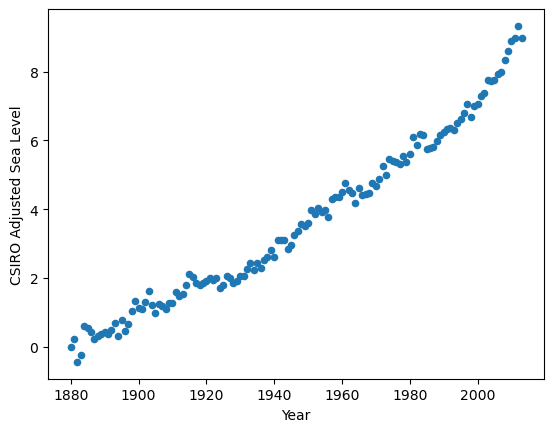

In [59]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

df = pd.read_csv('epa-sea-level.csv')

scatter = df.plot(kind='scatter',x = 'Year',y='CSIRO Adjusted Sea Level')

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

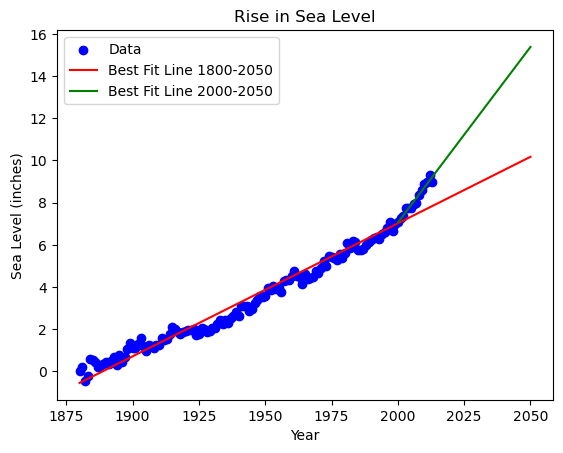

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

def draw_plots():
    df = pd.read_csv('epa-sea-level.csv')
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')

    # Create the first line of best fit 
    slope, intercept, r_value, p_value, std_err = linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
    years_extended = range(1880,2051)
    plt.plot(years_extended, intercept + slope * years_extended, 'r', label='Best Fit Line 1800-2050');

    # Create second line of best fit 
    df_recent = df[df['Year']>=2000]
    slope_recent, intercept_recent, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    years_recent_extended = range(2000,2051)
    plt.plot(years_recent_extended, intercept_recent + slope_recent * years_recent_extended,'g',label='Best Fit Line 2000-2050');

    # Add labels and title 
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()

    # SAve the plot 
    plt.savefig('sea_level_plot.png');
    return plt.gca()

draw_plots()